In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
from scipy.stats import linregress

In [2]:
from matplotlib import gridspec

In [3]:
import seaborn as sns

In [4]:
G = nx.petersen_graph()

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


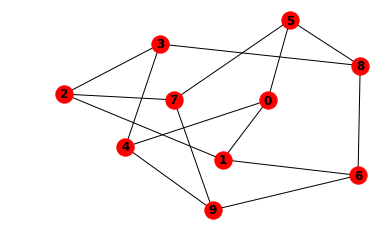

In [5]:
plt.subplot(111)
nx.draw(G, with_labels=True, font_weight='bold')

In [6]:
G.number_of_edges()

15

In [7]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [8]:
G.edges()

EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)])

In [9]:
H = nx.barabasi_albert_graph(10,5)

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


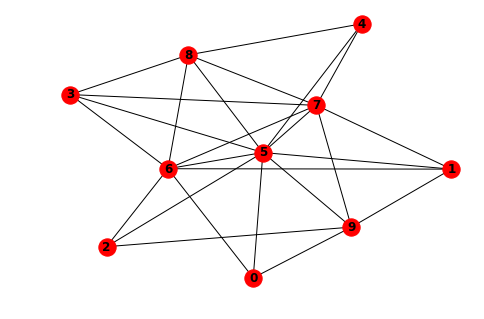

In [10]:
nx.draw(H, with_labels=True, font_weight='bold')

In [11]:
H.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [12]:
nx.node_connected_component(G,0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [13]:
list(nx.neighbors(G,0))

[1, 4, 5]

In [14]:
list(nx.intersection(G, H))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
# intersection pandas - intersection between set of nodes
# neigbour networkx

In [16]:
# Make the graph nx.from_pandas_dataframe

In [17]:
import pandas as pd
import numpy as np

In [18]:
a = pd.Index([1,2,3,'Rotterdam'])

In [19]:
b = pd.Index(['Rotterdam',5,6])

# Mulai Notes

In [20]:
# Algorithm - Cek Inland dl
# Create graph from pandas dataframe
# Focus on top 12 ports
# Make list of neighbours of 12 ports
# Find the intersection between 12 ports pairs
# Calculate connectivity index
# Calculate cooperation index

In [21]:
# For 12 ports
# Calculate / lists the exclusive nodes of a particular pair of ports
# Calculate / list the common nodes or intersections of a particular pair of ports
# Calculate connectivity index

In [22]:
# Calculate cooperation index

In [23]:
df = pd.read_excel("201902_raw_08042019.xlsx")

In [24]:
df.head()

,O_Country_ID,O_Country,O_City,O_Terminal,D_Country_ID,D_Country,D_City,D_Terminal,Carrier_ID,Carrier,...,Friday,Saturday,Sunday,Number of departures per week,Transport time (days),Comment,O_City_Longitude,O_City_Latitude,D_City_Longitude,D_City_Latitude
0,FR024,France,Dourges,Lille Dourges Container Terminal (LDCT),FR083,France,Dunkerque,Nord France Terminal International (NFTI),P280,Nord Ports Shuttle,...,0,0,0,2,2,Current time schedule (Jan 2015),2.988050,50.436856,2.377252,51.034771
1,FR030,France,Lille,Lille Conteneurs Terminal (LCT),FR083,France,Dunkerque,Nord France Terminal International (NFTI),P280,Nord Ports Shuttle,...,0,0,0,2,2,Current time schedule (Jan 2015),3.070641,50.630509,2.377252,51.034771
2,FR083,France,Dunkerque,Nord France Terminal International (NFTI),FR024,France,Dourges,Lille Dourges Container Terminal (LDCT),P280,Nord Ports Shuttle,...,0,1,0,1,2,Current time schedule (Jan 2015),2.377252,51.034771,2.988050,50.436856
3,FR083,France,Dunkerque,Nord France Terminal International (NFTI),FR024,France,Dourges,Lille Dourges Container Terminal (LDCT),P280,Nord Ports Shuttle,...,0,0,0,1,1,Current time schedule (Jan 2015),2.377252,51.034771,2.988050,50.436856
4,FR083,France,Dunkerque,Nord France Terminal International (NFTI),FR030,France,Lille,Lille Conteneurs Terminal (LCT),P280,Nord Ports Shuttle,...,0,1,0,1,2,Current time schedule (Jan 2015),2.377252,51.034771,3.070641,50.630509


In [25]:
df_origin = df[(df['O_City'] == 'Rotterdam') | (df['O_City'] == 'Antwerp') | (df['O_City'] == 'Hamburg')|
              (df['O_City'] == 'Bremerhaven') | (df['O_City'] == 'Valencia') | (df['O_City'] == 'Piraeus')|
              (df['O_City'] == 'Algeciras') | (df['O_City'] == 'Felixstowe') | (df['O_City'] == 'Barcelona')|
              (df['O_City'] == 'Marsaxlokk') | (df['O_City'] == 'Le Havre') | (df['O_City'] == 'Southampton')]

In [26]:
df_destination = df[(df['D_City'] == 'Rotterdam') | (df['D_City'] == 'Antwerp') | (df['D_City'] == 'Hamburg')|
              (df['D_City'] == 'Bremerhaven') | (df['D_City'] == 'Valencia') | (df['D_City'] == 'Piraeus')|
              (df['D_City'] == 'Algeciras') | (df['D_City'] == 'Felixstowe') | (df['D_City'] == 'Barcelona')|
              (df['D_City'] == 'Marsaxlokk') | (df['D_City'] == 'Le Havre') | (df['D_City'] == 'Southampton')]

In [27]:
# Make a new table that only contains 12 hubs
df_all = pd.concat([df_origin, df_destination])
df_all.head()

,O_Country_ID,O_Country,O_City,O_Terminal,D_Country_ID,D_Country,D_City,D_Terminal,Carrier_ID,Carrier,...,Friday,Saturday,Sunday,Number of departures per week,Transport time (days),Comment,O_City_Longitude,O_City_Latitude,D_City_Longitude,D_City_Latitude
14,DE031,Germany,Hamburg,Burchardkai (CTB),DE004,Germany,Braunschweig,Braunschweig Containerterminal,P262,Weets Bahn Transport,...,1,0,0,3,2,Current time schedule (August 2015) - contact ...,10.000654,53.550341,10.523607,52.264658
15,DE031,Germany,Hamburg,Burchardkai (CTB),DE038,Germany,Ingolstadt,DUSS-Terminal Ingolstadt,P262,Weets Bahn Transport,...,1,0,0,5,2,Current time schedule (August 2015) - contact ...,10.000654,53.550341,11.425040,48.763016
16,DE031,Germany,Hamburg,Burchardkai (CTB),DE182,Germany,Kassel,Kassel Ubf,P262,Weets Bahn Transport,...,1,1,1,7,2,Current time schedule (August 2015) - contact ...,10.000654,53.550341,9.462471,51.307687
17,DE031,Germany,Hamburg,Burchardkai (CTB),DE193,Germany,Halle,Container Terminal Halle Saale (CTHS),P262,Weets Bahn Transport,...,1,0,0,5,2,Current time schedule (August 2015) - contact ...,10.000654,53.550341,8.359316,52.062168
18,DE031,Germany,Hamburg,Burchardkai (CTB),DE195,Germany,Beiseförth,DUSS-Terminal Beiseförth,P262,Weets Bahn Transport,...,0,1,0,3,2,Current time schedule (August 2015) - contact ...,10.000654,53.550341,9.547484,51.080244


In [28]:
# reset index
df_all.reset_index(drop=True, inplace=True)

In [29]:
df_all.columns

Index(['O_Country_ID', 'O_Country', 'O_City', 'O_Terminal', 'D_Country_ID',
       'D_Country', 'D_City', 'D_Terminal', 'Carrier_ID', 'Carrier',
       'Modality', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Number of departures per week',
       'Transport time (days)', 'Comment', 'O_City_Longitude',
       'O_City_Latitude', 'D_City_Longitude', 'D_City_Latitude'],
      dtype='object')

In [30]:
df_inland = df_all[df_all['Modality'] == 'Inland shipping']

In [31]:
df_inland.reset_index(drop=True, inplace=True)

In [32]:
df_rail = df_all[df_all['Modality'] == 'Rail']
df_rail.reset_index(drop=True, inplace=True)

In [33]:
df_sea = df_all[df_all['Modality'] == 'Sea']
df_sea.reset_index(drop=True, inplace=True)

In [34]:
G_inland = nx.from_pandas_edgelist(df_inland, source='O_City', target='D_City')

In [35]:
G_rail = nx.from_pandas_edgelist(df_rail, source='O_City', target='D_City')

In [267]:
G_sea = nx.from_pandas_edgelist(df_sea, source='O_City', target='D_City')

In [37]:
G_all = nx.from_pandas_edgelist(df_all, source='O_City', target='D_City')

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


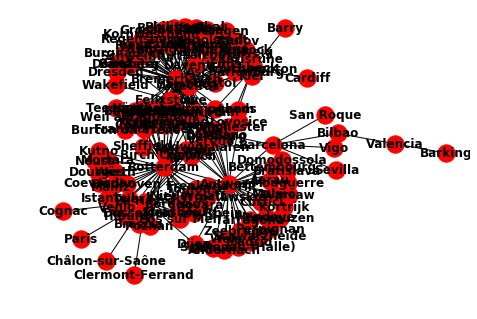

In [38]:
nx.draw_kamada_kawai(G_rail, with_labels=True, font_weight='bold')

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


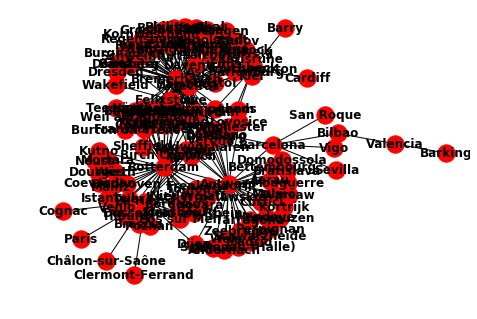

In [39]:
nx.draw_kamada_kawai(G_rail, with_labels=True, font_weight='bold')

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


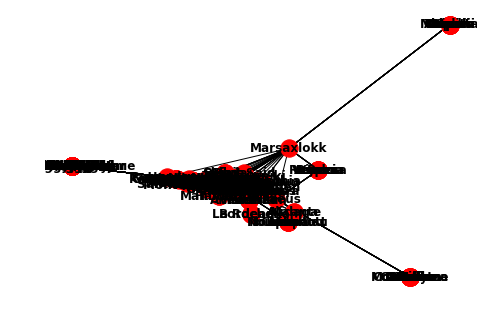

In [251]:
nx.draw_spectral(G_sea, with_labels=True, font_weight='bold')

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


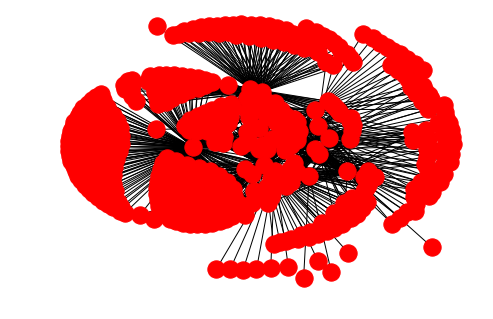

In [41]:
nx.draw_kamada_kawai(G_all, with_labels=False, font_weight='bold')

In [42]:
hubs = ['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le Havre',
 'Southampton']

# Inland Connectivity and Cooperation

In [43]:
# List down available hubs in rail graph
inland_hubs = list()
for ports in hubs:
    if ports in list(G_inland.nodes()):
        inland_hubs.append(ports)
        
# Check and list down all the neighbours
hub_inland_neighbors = dict()
for ports in inland_hubs:
    hub_inland_neighbors[ports] = list(nx.neighbors(G_inland, ports))
    
df_inland_intersection = pd.DataFrame(columns=inland_hubs, index=inland_hubs)

# Find intersection
# sea_intersection = dict()

for i in inland_hubs:
    for j in inland_hubs:
        if i==j:
            df_inland_intersection.loc[i,j] = 0
        else:
            n_intersection = len(list(set(hub_inland_neighbors[i]) & set(hub_inland_neighbors[j])))
            df_inland_intersection.loc[i,j] = n_intersection
            
df_inland_intersection

,Rotterdam,Antwerp,Hamburg,Le Havre
Rotterdam,0,55,0,0
Antwerp,55,0,0,0
Hamburg,0,0,0,0
Le Havre,0,0,0,0


In [44]:
# Find exclusive nodes
# Make dataframe to save number of exclusive nodes
df_inland_exclusive = pd.DataFrame(columns=inland_hubs, index=inland_hubs)

# Input value to dataframe
for i in inland_hubs:
    for j in inland_hubs:
        if i==j:
            df_inland_exclusive.loc[i,j] = 0
        else:
            n_exclusive = len(list(set(hub_inland_neighbors[i]) & set(set(hub_inland_neighbors[j]) ^ set(hub_inland_neighbors[i])))) + 1
            df_inland_exclusive.loc[i,j] = n_exclusive
            
df_inland_exclusive

,Rotterdam,Antwerp,Hamburg,Le Havre
Rotterdam,0,22,77,77
Antwerp,5,0,60,60
Hamburg,8,8,0,8
Le Havre,6,6,6,0


In [45]:
# Find cooperation index
# Make cooperation index dataframe
df_inland_cooperation = pd.DataFrame(columns=inland_hubs, index=inland_hubs)

# calculate the cooperation index and input it to dataframe
for i in inland_hubs:
    for j in inland_hubs:
        if i==j:
            df_inland_cooperation.loc[i,j] = 0
        else:
            n_cooperation = (df_inland_exclusive.loc[i,j] * df_inland_exclusive.loc[j,i]) / \
                            ((df_inland_exclusive.loc[i,j] + df_inland_intersection.loc[i,j])* \
                             (df_inland_exclusive.loc[j,i] + df_inland_intersection.loc[i,j]))

            df_inland_cooperation.loc[i,j] = n_cooperation
            
df_inland_cooperation

,Rotterdam,Antwerp,Hamburg,Le Havre
Rotterdam,0,0.0238095,1,1
Antwerp,0.0238095,0,1,1
Hamburg,1,1,0,1
Le Havre,1,1,1,0


In [46]:
# Calculate the connectivity index
# Calculate the numerator connectivity
# Make dataframe of numerator connectivity
df_inland_numerator_connectivity = pd.DataFrame(columns=inland_hubs, index=inland_hubs)

# Calculate numerator connectivity and input to dataframe
for i in inland_hubs:
    for j in inland_hubs:
        if i==j:
            df_inland_numerator_connectivity.loc[i,j] = 0
        else:
            n_numerator = 2 * (df_inland_exclusive.loc[i,j] + df_inland_intersection.loc[i,j]) * \
                              (df_inland_exclusive.loc[j,i] + df_inland_intersection.loc[i,j])
            df_inland_numerator_connectivity.loc[i,j] = n_numerator
            
# Calculate the denominator
inland_connectivity_denominator = sum(df_inland_numerator_connectivity.sum(axis=0))

dict_inland_connectivity = dict(df_inland_numerator_connectivity.sum(axis=0))

# Calculate the connectivity
inland_connectivity = dict()

for i in inland_hubs:
    inland_connectivity[i] = dict_inland_connectivity[i] / inland_connectivity_denominator
    
inland_connectivity

{'Antwerp': 0.4145156392347404,
 'Hamburg': 0.08685089583965988,
 'Le Havre': 0.06604919526267841,
 'Rotterdam': 0.43258426966292135}

# Inland Connectivity and Cooperation - old

In [47]:
# List down available hubs in inland graph
inland_hubs = list()
for ports in hubs:
    if ports in list(G_inland.nodes()):
        inland_hubs.append(ports)

In [48]:
inland_hubs

['Rotterdam', 'Antwerp', 'Hamburg', 'Le Havre']

In [49]:
# Check and list down all the neighbours
hub_neighbors = dict()
for ports in inland_hubs:
    hub_neighbors[ports] = list(nx.neighbors(G_inland, ports))

In [50]:
# List down Rotterdam and Antwerp neighbors
Rotterdam_neighbors = hub_neighbors['Rotterdam']
Antwerp_neighbors = hub_neighbors['Antwerp']

In [51]:
# Find intersection and exclusive nodes - for Rotterdam and Antwerp

In [52]:
Rotterdam_intersection_Antwerp = list(set(Rotterdam_neighbors) & set(Antwerp_neighbors))

In [53]:
# Find exclusive nodes
Rotterdam_exclusive_Antwerp = list(set(Rotterdam_neighbors) & set(set(Antwerp_neighbors) ^ set(Rotterdam_neighbors)))

In [54]:
Antwerp_exclusive_Rotterdam = list(set(Antwerp_neighbors) & set(set(Antwerp_neighbors) ^ set(Rotterdam_neighbors)))

In [55]:
# Batasan antwerp neighbours

In [56]:
Hamburg_neighbors = hub_neighbors['Hamburg']

# Find intersection and exclusive nodes - Rotterdam vs Hamburg
Rotterdam_intersection_Hamburg = list(set(Rotterdam_neighbors) & set(Hamburg_neighbors))
Rotterdam_exclusive_Hamburg = list(set(Rotterdam_neighbors) & set(set(Hamburg_neighbors) ^ set(Rotterdam_neighbors)))
Hamburg_exclusive_Rotterdam = list(set(Hamburg_neighbors) & set(set(Hamburg_neighbors) ^ set(Rotterdam_neighbors)))

In [57]:
# Find intersection and exclusive nodes - Antwerp vs Hamburg
Antwerp_intersection_Hamburg = list(set(Antwerp_neighbors) & set(Hamburg_neighbors))
Antwerp_exclusive_Hamburg = list(set(Antwerp_neighbors) & set(set(Hamburg_neighbors) ^ set(Antwerp_neighbors)))
Hamburg_exclusive_Antwerp = list(set(Hamburg_neighbors) & set(set(Hamburg_neighbors) ^ set(Antwerp_neighbors)))

In [58]:
# Cooperation Index

In [59]:
# Rotterdam vs Antwerp
n_Rotterdam_exclusive_Antwerp = len(Rotterdam_exclusive_Antwerp) + 1
n_Antwerp_exclusive_Rotterdam = len(Antwerp_exclusive_Rotterdam) + 1
n_Rotterdam_intersection_Antwerp = len(Rotterdam_intersection_Antwerp)

In [60]:
# Antwerp vs Hamburg
n_Hamburg_exclusive_Antwerp = len(Hamburg_exclusive_Antwerp) + 1
n_Antwerp_exclusive_Hamburg = len(Antwerp_exclusive_Hamburg) + 1
n_Antwerp_intersection_Hamburg = len(Antwerp_intersection_Hamburg)

In [61]:
n_Hamburg_exclusive_Antwerp

8

In [62]:
n_Antwerp_exclusive_Hamburg

60

In [63]:
n_Antwerp_intersection_Hamburg

0

In [64]:
# Rotterdam vs Hamburg
n_Rotterdam_exclusive_Hamburg = len(Rotterdam_exclusive_Hamburg) + 1
n_Hamburg_exclusive_Rotterdam = len(Hamburg_exclusive_Rotterdam) + 1
n_Rotterdam_intersection_Hamburg = len(Rotterdam_intersection_Hamburg)

In [65]:
# Cooperation Index Rotterdam vs Antwerp
cooperation_rotterdam_antwerp = (n_Rotterdam_exclusive_Antwerp * n_Antwerp_exclusive_Rotterdam) / \
                            ((n_Rotterdam_exclusive_Antwerp + n_Rotterdam_intersection_Antwerp)* \
                             (n_Antwerp_exclusive_Rotterdam + n_Rotterdam_intersection_Antwerp))

In [66]:
cooperation_rotterdam_antwerp

0.023809523809523808

In [67]:
# Cooperation Index Antwerp vs Hamburg
cooperation_antwerp_hamburg = (n_Antwerp_exclusive_Hamburg * n_Hamburg_exclusive_Antwerp) / \
                            ((n_Hamburg_exclusive_Antwerp + n_Antwerp_intersection_Hamburg)* \
                             (n_Antwerp_exclusive_Hamburg + n_Antwerp_intersection_Hamburg))
    
cooperation_antwerp_hamburg

1.0

In [68]:
# Cooperation Index Rotterdam vs Hamburg
cooperation_rotterdam_hamburg = (n_Rotterdam_exclusive_Hamburg * n_Hamburg_exclusive_Rotterdam) / \
                            ((n_Rotterdam_exclusive_Hamburg + n_Rotterdam_intersection_Hamburg)* \
                             (n_Hamburg_exclusive_Rotterdam + n_Rotterdam_intersection_Hamburg))
    
cooperation_rotterdam_hamburg

1.0

In [69]:
# Connectivity Index - Part I to calculate the numerator of connectivity index for each hub

In [70]:
# Connectivity Part 1 - Rotterdam
n_numerator_connectivity_rotterdam_antwerp = 2 * (n_Rotterdam_exclusive_Antwerp + n_Rotterdam_intersection_Antwerp) * \
                                                (n_Antwerp_exclusive_Rotterdam + n_Rotterdam_intersection_Antwerp)
n_numerator_connectivity_rotterdam_hamburg = 2 * (n_Rotterdam_exclusive_Hamburg + n_Rotterdam_intersection_Hamburg) * \
                                                (n_Hamburg_exclusive_Rotterdam + n_Rotterdam_intersection_Hamburg)
    
n_numerator_connectivity_rotterdam = n_numerator_connectivity_rotterdam_antwerp + n_numerator_connectivity_rotterdam_hamburg

In [71]:
# Connectivity Part 1 - Antwerp
n_numerator_connectivity_antwerp_hamburg = 2 * (n_Hamburg_exclusive_Antwerp + n_Antwerp_intersection_Hamburg) * \
                                                (n_Antwerp_exclusive_Hamburg + n_Antwerp_intersection_Hamburg)

# Sama ama case rotterdam, bolak balik sama
# Numerator pake case connectivity rotterdam vs antwerp

n_numerator_connectivity_antwerp = n_numerator_connectivity_antwerp_hamburg + n_numerator_connectivity_rotterdam_antwerp

In [72]:
# Connectivity Part 1 - Hamburg
n_numerator_connectivity_hamburg = n_numerator_connectivity_rotterdam_hamburg + n_numerator_connectivity_antwerp_hamburg

In [73]:
# Denominator
n_denominator = n_numerator_connectivity_antwerp + n_numerator_connectivity_hamburg + n_numerator_connectivity_rotterdam

In [74]:
# Connectivity Rotterdam
connectivity_rotterdam = n_numerator_connectivity_rotterdam / n_denominator
connectivity_rotterdam

0.45801259622113366

In [75]:
# Connectivity Antwerp
connectivity_antwerp = n_numerator_connectivity_antwerp / n_denominator
connectivity_antwerp

0.4461161651504549

In [76]:
# connectivity Hamburg
connectivity_hamburg = n_numerator_connectivity_hamburg / n_denominator
connectivity_hamburg

0.09587123862841147

# Rail Cooperation and Connectivity

In [77]:
# List down available hubs in rail graph
rail_hubs = list()
for ports in hubs:
    if ports in list(G_rail.nodes()):
        rail_hubs.append(ports)

In [78]:
rail_hubs

['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Le Havre',
 'Southampton']

In [79]:
# Check and list down all the neighbours
hub_rail_neighbors = dict()
for ports in rail_hubs:
    hub_rail_neighbors[ports] = list(nx.neighbors(G_rail, ports))

In [80]:
hub_rail_neighbors

{'Algeciras': ['Córdoba'],
 'Antwerp': ['Kortrijk',
  'Katy Wroclawskie',
  'Mouguerre',
  'Bettembourg',
  'Domodossola',
  'Novara',
  'Athus',
  'Frenkendorf',
  'Niederglatt',
  'Rotterdam',
  'Verona',
  'Toulouse',
  'Bordeaux',
  'Dijon',
  'Marseille',
  'Strasbourg',
  'Lyon',
  'Fos sur Mer ',
  'Andernach',
  'Wels',
  'Wien',
  'Zeebrugge',
  'Basel',
  'Lovosice',
  'Schkopau (Halle)',
  'Ludwigshafen',
  'Barcelona',
  'Madrid',
  'Tarragona',
  'Hendaye',
  'Milano',
  'Curtici',
  'Malmö',
  'Bratislava',
  'Kehl am Rhein',
  'Duisburg',
  'Schwarzheide',
  'Perpignan',
  'Terneuzen',
  'Warsaw',
  'Aarau'],
 'Barcelona': ['Sevilla',
  'Vigo',
  'San Roque',
  'Bilbao',
  'Antwerp',
  'Ludwigshafen',
  'Milano'],
 'Bremerhaven': ['Braunschweig',
  'Ingolstadt',
  'Kassel',
  'Halle',
  'Beiseförth ',
  'Philippsthal',
  'Enns',
  'Salzburg',
  'Wien',
  'Basel',
  'Augsburg',
  'Ulm',
  'Dortmund',
  'Erfurt',
  'Frankfurt am Main',
  'Grossbeeren',
  'Kornwestheim',
  

In [81]:
df_rail_intersection = pd.DataFrame(columns=rail_hubs, index=rail_hubs)

In [82]:
df_rail_intersection

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Algeciras,Felixstowe,Barcelona,Le Havre,Southampton
Rotterdam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hamburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bremerhaven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeciras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Felixstowe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Le Havre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Find intersection
# rail_intersection = dict()

for i in rail_hubs:
    for j in rail_hubs:
        if i==j:
            df_rail_intersection.loc[i,j] = 0
        else:
            n_intersection = len(list(set(hub_rail_neighbors[i]) & set(hub_rail_neighbors[j])))
            df_rail_intersection.loc[i,j] = n_intersection

In [84]:
df_rail_intersection

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Algeciras,Felixstowe,Barcelona,Le Havre,Southampton
Rotterdam,0,17,22,14,0,0,0,3,6,0
Antwerp,17,0,9,3,0,0,0,2,7,0
Hamburg,22,9,0,36,0,0,0,2,3,0
Bremerhaven,14,3,36,0,0,0,0,1,1,0
Valencia,0,0,0,0,0,0,0,1,0,0
Algeciras,0,0,0,0,0,0,0,0,0,0
Felixstowe,0,0,0,0,0,0,0,0,0,7
Barcelona,3,2,2,1,1,0,0,0,1,0
Le Havre,6,7,3,1,0,0,0,1,0,0
Southampton,0,0,0,0,0,0,7,0,0,0


In [85]:
# Find exclusive nodes
# Make dataframe to save number of exclusive nodes
df_rail_exclusive = pd.DataFrame(columns=rail_hubs, index=rail_hubs)

# Input value to dataframe
for i in rail_hubs:
    for j in rail_hubs:
        if i==j:
            df_rail_exclusive.loc[i,j] = 0
        else:
            n_exclusive = len(list(set(hub_rail_neighbors[i]) & set(set(hub_rail_neighbors[j]) ^ set(hub_rail_neighbors[i])))) + 1
            df_rail_exclusive.loc[i,j] = n_exclusive

In [86]:
df_rail_exclusive

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Algeciras,Felixstowe,Barcelona,Le Havre,Southampton
Rotterdam,0,31,26,34,48,48,48,45,42,48
Antwerp,25,0,33,39,42,42,42,40,35,42
Hamburg,30,43,0,16,52,52,52,50,49,52
Bremerhaven,23,34,1,0,37,37,37,36,36,37
Valencia,3,3,3,3,0,3,3,2,3,3
Algeciras,2,2,2,2,2,0,2,2,2,2
Felixstowe,16,16,16,16,16,16,0,16,16,9
Barcelona,5,6,6,7,7,8,8,0,7,8
Le Havre,6,5,9,11,12,12,12,11,0,12
Southampton,10,10,10,10,10,10,3,10,10,0


In [87]:
# Find cooperation index
# Make cooperation index dataframe
df_rail_cooperation = pd.DataFrame(columns=rail_hubs, index=rail_hubs)

In [88]:
# calculate the cooperation index and input it to dataframe
for i in rail_hubs:
    for j in rail_hubs:
        if i==j:
            df_rail_cooperation.loc[i,j] = 0
        else:
            n_cooperation = (df_rail_exclusive.loc[i,j] * df_rail_exclusive.loc[j,i]) / \
                            ((df_rail_exclusive.loc[i,j] + df_rail_intersection.loc[i,j])* \
                             (df_rail_exclusive.loc[j,i] + df_rail_intersection.loc[i,j]))

            df_rail_cooperation.loc[i,j] = n_cooperation

In [89]:
df_rail_cooperation

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Algeciras,Felixstowe,Barcelona,Le Havre,Southampton
Rotterdam,0,0.384425,0.3125,0.440315,1,1,1,0.585938,0.4375,1
Antwerp,0.384425,0,0.649725,0.853282,1,1,1,0.714286,0.347222,1
Hamburg,0.3125,0.649725,0,0.00831601,1,1,1,0.721154,0.706731,1
Bremerhaven,0.440315,0.853282,0.00831601,0,1,1,1,0.851351,0.891892,1
Valencia,1,1,1,1,0,1,1,0.583333,1,1
Algeciras,1,1,1,1,1,0,1,1,1,1
Felixstowe,1,1,1,1,1,1,0,1,1,0.16875
Barcelona,0.585938,0.714286,0.721154,0.851351,0.583333,1,1,0,0.802083,1
Le Havre,0.4375,0.347222,0.706731,0.891892,1,1,1,0.802083,0,1
Southampton,1,1,1,1,1,1,0.16875,1,1,0


In [90]:
# Calculate the connectivity index
# Calculate the numerator connectivity
# Make dataframe of numerator connectivity
df_rail_numerator_connectivity = pd.DataFrame(columns=rail_hubs, index=rail_hubs)

In [91]:
df_rail_numerator_connectivity

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Algeciras,Felixstowe,Barcelona,Le Havre,Southampton
Rotterdam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hamburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bremerhaven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeciras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Felixstowe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Le Havre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Calculate numerator connectivity and input to dataframe
for i in rail_hubs:
    for j in rail_hubs:
        if i==j:
            df_rail_numerator_connectivity.loc[i,j] = 0
        else:
            n_numerator = 2 * (df_rail_exclusive.loc[i,j] + df_rail_intersection.loc[i,j]) * \
                              (df_rail_exclusive.loc[j,i] + df_rail_intersection.loc[i,j])
            df_rail_numerator_connectivity.loc[i,j] = n_numerator

In [93]:
df_rail_numerator_connectivity

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Algeciras,Felixstowe,Barcelona,Le Havre,Southampton
Rotterdam,0,4032,4992,3552,288,192,1536,768,1152,960
Antwerp,4032,0,4368,3108,252,168,1344,672,1008,840
Hamburg,4992,4368,0,3848,312,208,1664,832,1248,1040
Bremerhaven,3552,3108,3848,0,222,148,1184,592,888,740
Valencia,288,252,312,222,0,12,96,48,72,60
Algeciras,192,168,208,148,12,0,64,32,48,40
Felixstowe,1536,1344,1664,1184,96,64,0,256,384,320
Barcelona,768,672,832,592,48,32,256,0,192,160
Le Havre,1152,1008,1248,888,72,48,384,192,0,240
Southampton,960,840,1040,740,60,40,320,160,240,0


In [94]:
rail_connectivity_denominator = sum(df_rail_numerator_connectivity.sum(axis=0))

In [95]:
dict_rail_connectivity = dict(df_rail_numerator_connectivity.sum(axis=0))

In [96]:
dict_rail_connectivity

{'Algeciras': 912,
 'Antwerp': 15792,
 'Barcelona': 3552,
 'Bremerhaven': 14282,
 'Felixstowe': 6848,
 'Hamburg': 18512,
 'Le Havre': 5232,
 'Rotterdam': 17472,
 'Southampton': 4400,
 'Valencia': 1362}

In [97]:
# Calculate the connectivity
rail_connectivity = dict()

for i in rail_hubs:
    rail_connectivity[i] = dict_rail_connectivity[i] / rail_connectivity_denominator

In [98]:
rail_connectivity

{'Algeciras': 0.01032094518129555,
 'Antwerp': 0.17871531392874926,
 'Barcelona': 0.040197365442940565,
 'Bremerhaven': 0.16162690688515685,
 'Felixstowe': 0.07749762346657009,
 'Hamburg': 0.20949708025892896,
 'Le Havre': 0.05920963288216921,
 'Rotterdam': 0.1977275813679779,
 'Southampton': 0.04979403376940836,
 'Valencia': 0.015413516816803223}

# Sea Cooperation and Connectivity

In [99]:
# List down available hubs in rail graph
sea_hubs = list()
for ports in hubs:
    if ports in list(G_sea.nodes()):
        sea_hubs.append(ports)

In [100]:
sea_hubs

['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le Havre',
 'Southampton']

In [101]:
# Check and list down all the neighbours
hub_sea_neighbors = dict()
for ports in sea_hubs:
    hub_sea_neighbors[ports] = list(nx.neighbors(G_sea, ports))

In [102]:
df_sea_intersection = pd.DataFrame(columns=sea_hubs, index=sea_hubs)

In [103]:
# Find intersection
# sea_intersection = dict()

for i in sea_hubs:
    for j in sea_hubs:
        if i==j:
            df_sea_intersection.loc[i,j] = 0
        else:
            n_intersection = len(list(set(hub_sea_neighbors[i]) & set(hub_sea_neighbors[j])))
            df_sea_intersection.loc[i,j] = n_intersection

In [104]:
df_sea_intersection

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Piraeus,Algeciras,Felixstowe,Barcelona,Marsaxlokk,Le Havre,Southampton
Rotterdam,0,67,57,61,36,31,30,35,29,24,29,19
Antwerp,67,0,44,40,41,37,31,36,28,28,33,23
Hamburg,57,44,0,64,27,20,21,27,22,16,18,14
Bremerhaven,61,40,64,0,20,19,13,30,14,21,12,11
Valencia,36,41,27,20,0,36,35,25,42,23,22,21
Piraeus,31,37,20,19,36,0,20,22,25,30,18,23
Algeciras,30,31,21,13,35,20,0,17,24,15,20,9
Felixstowe,35,36,27,30,25,22,17,0,18,24,11,13
Barcelona,29,28,22,14,42,25,24,18,0,16,15,16
Marsaxlokk,24,28,16,21,23,30,15,24,16,0,10,11


In [105]:
# Find exclusive nodes
# Make dataframe to save number of exclusive nodes
df_sea_exclusive = pd.DataFrame(columns=sea_hubs, index=sea_hubs)

# Input value to dataframe
for i in sea_hubs:
    for j in sea_hubs:
        if i==j:
            df_sea_exclusive.loc[i,j] = 0
        else:
            n_exclusive = len(list(set(hub_sea_neighbors[i]) & set(set(hub_sea_neighbors[j]) ^ set(hub_sea_neighbors[i])))) + 1
            df_sea_exclusive.loc[i,j] = n_exclusive

In [106]:
df_sea_exclusive

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Piraeus,Algeciras,Felixstowe,Barcelona,Marsaxlokk,Le Havre,Southampton
Rotterdam,0,85,95,91,116,121,122,117,123,128,123,133
Antwerp,25,0,48,52,51,55,61,56,64,64,59,69
Hamburg,29,42,0,22,59,66,65,59,64,70,68,72
Bremerhaven,24,45,21,0,65,66,72,55,71,64,73,74
Valencia,28,23,37,44,0,28,29,39,22,41,42,43
Piraeus,31,25,42,43,26,0,42,40,37,32,44,39
Algeciras,20,19,29,37,15,30,0,33,26,35,30,41
Felixstowe,8,7,16,13,18,21,26,0,25,19,32,30
Barcelona,16,17,23,31,3,20,21,27,0,29,30,29
Marsaxlokk,23,19,31,26,24,17,32,23,31,0,37,36


In [107]:
# Find cooperation index
# Make cooperation index dataframe
df_sea_cooperation = pd.DataFrame(columns=sea_hubs, index=sea_hubs)

In [108]:
# calculate the cooperation index and input it to dataframe
for i in sea_hubs:
    for j in sea_hubs:
        if i==j:
            df_sea_cooperation.loc[i,j] = 0
        else:
            n_cooperation = (df_sea_exclusive.loc[i,j] * df_sea_exclusive.loc[j,i]) / \
                            ((df_sea_exclusive.loc[i,j] + df_sea_intersection.loc[i,j])* \
                             (df_sea_exclusive.loc[j,i] + df_sea_intersection.loc[i,j]))

            df_sea_cooperation.loc[i,j] = n_cooperation

In [109]:
df_sea_cooperation

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Piraeus,Algeciras,Felixstowe,Barcelona,Marsaxlokk,Le Havre,Southampton
Rotterdam,0,0.151959,0.210756,0.16904,0.333882,0.398026,0.321053,0.143207,0.287719,0.412094,0.222533,0.301724
Antwerp,0.151959,0,0.254803,0.299233,0.199219,0.241059,0.251957,0.09909,0.262802,0.281221,0.112228,0.155172
Hamburg,0.210756,0.254803,0,0.0632011,0.396621,0.51988,0.438372,0.255273,0.380362,0.536863,0.434884,0.433039
Bremerhaven,0.16904,0.299233,0.0632011,0,0.525735,0.53852,0.626824,0.195622,0.575425,0.416521,0.601176,0.540365
Valencia,0.333882,0.199219,0.396621,0.525735,0,0.183468,0.135937,0.255087,0.0229167,0.327128,0.295312,0.185345
Piraeus,0.398026,0.241059,0.51988,0.53852,0.183468,0,0.406452,0.315079,0.265233,0.186685,0.390323,0.130145
Algeciras,0.321053,0.251957,0.438372,0.626824,0.135937,0.406452,0,0.39907,0.242667,0.476596,0.3,0.565517
Felixstowe,0.143207,0.09909,0.255273,0.195622,0.255087,0.315079,0.39907,0,0.348837,0.21623,0.539535,0.384924
Barcelona,0.287719,0.262802,0.380362,0.575425,0.0229167,0.265233,0.242667,0.348837,0,0.425059,0.416667,0.288889
Marsaxlokk,0.412094,0.281221,0.536863,0.416521,0.327128,0.186685,0.476596,0.21623,0.425059,0,0.590426,0.475422


In [110]:
# Calculate the connectivity index
# Calculate the numerator connectivity
# Make dataframe of numerator connectivity
df_sea_numerator_connectivity = pd.DataFrame(columns=sea_hubs, index=sea_hubs)

# Calculate numerator connectivity and input to dataframe
for i in sea_hubs:
    for j in sea_hubs:
        if i==j:
            df_sea_numerator_connectivity.loc[i,j] = 0
        else:
            n_numerator = 2 * (df_sea_exclusive.loc[i,j] + df_sea_intersection.loc[i,j]) * \
                              (df_sea_exclusive.loc[j,i] + df_sea_intersection.loc[i,j])
            df_sea_numerator_connectivity.loc[i,j] = n_numerator

In [111]:
# Calculate the denominator
sea_connectivity_denominator = sum(df_sea_numerator_connectivity.sum(axis=0))

dict_sea_connectivity = dict(df_sea_numerator_connectivity.sum(axis=0))

In [112]:
# Calculate the connectivity
sea_connectivity = dict()

for i in sea_hubs:
    sea_connectivity[i] = dict_sea_connectivity[i] / sea_connectivity_denominator

In [113]:
sea_connectivity

{'Algeciras': 0.06571148336837945,
 'Antwerp': 0.11409277579418281,
 'Barcelona': 0.0595372500317532,
 'Bremerhaven': 0.10646142339011276,
 'Felixstowe': 0.05704285976375619,
 'Hamburg': 0.10756220099069984,
 'Le Havre': 0.05327481336174657,
 'Marsaxlokk': 0.06201752776640935,
 'Piraeus': 0.08016977377609055,
 'Rotterdam': 0.17241281982528683,
 'Southampton': 0.03918697695423305,
 'Valencia': 0.08253009497734938}

# Aggregate Network Cooperation and Connectivity

In [114]:
# List down available hubs in graph
all_hubs = list()
for ports in hubs:
    if ports in list(G_all.nodes()):
        all_hubs.append(ports)

In [115]:
all_hubs

['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le Havre',
 'Southampton']

In [116]:
# Check and list down all the neighbours
hub_all_neighbors = dict()
for ports in all_hubs:
    hub_all_neighbors[ports] = list(nx.neighbors(G_all, ports))
    
# Make intersection dataframe
df_all_intersection = pd.DataFrame(columns=all_hubs, index=all_hubs)

# Find intersection
# sea_intersection = dict()

for i in all_hubs:
    for j in all_hubs:
        if i==j:
            df_all_intersection.loc[i,j] = 0
        else:
            n_intersection = len(list(set(hub_all_neighbors[i]) & set(hub_all_neighbors[j])))
            df_all_intersection.loc[i,j] = n_intersection
            
df_all_intersection

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Piraeus,Algeciras,Felixstowe,Barcelona,Marsaxlokk,Le Havre,Southampton
Rotterdam,0,134,82,75,39,32,32,37,36,24,35,19
Antwerp,134,0,61,47,46,39,34,37,34,28,40,24
Hamburg,82,61,0,100,28,20,22,27,26,16,21,14
Bremerhaven,75,47,100,0,20,19,13,30,16,21,13,11
Valencia,39,46,28,20,0,36,36,26,44,23,25,21
Piraeus,32,39,20,19,36,0,20,24,26,30,19,23
Algeciras,32,34,22,13,36,20,0,17,26,15,22,9
Felixstowe,37,37,27,30,26,24,17,0,20,24,13,20
Barcelona,36,34,26,16,44,26,26,20,0,17,20,17
Marsaxlokk,24,28,16,21,23,30,15,24,17,0,10,11


In [117]:
# Find exclusive nodes
# Make dataframe to save number of exclusive nodes
df_all_exclusive = pd.DataFrame(columns=all_hubs, index=all_hubs)

# Input value to dataframe
for i in all_hubs:
    for j in all_hubs:
        if i==j:
            df_all_exclusive.loc[i,j] = 0
        else:
            n_exclusive = len(list(set(hub_all_neighbors[i]) & set(set(hub_all_neighbors[j]) ^ set(hub_all_neighbors[i])))) + 1
            df_all_exclusive.loc[i,j] = n_exclusive
            
df_all_exclusive

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Piraeus,Algeciras,Felixstowe,Barcelona,Marsaxlokk,Le Havre,Southampton
Rotterdam,0,118,170,177,213,220,220,215,216,228,217,233
Antwerp,44,0,117,131,132,139,144,141,144,150,138,154
Hamburg,60,81,0,42,114,122,120,115,116,126,121,128
Bremerhaven,46,74,21,0,101,102,108,91,105,100,108,110
Valencia,27,20,38,46,0,30,30,40,22,43,41,45
Piraeus,30,23,42,43,26,0,42,38,36,32,43,39
Algeciras,19,17,29,38,15,31,0,34,25,36,29,42
Felixstowe,20,20,30,27,31,33,40,0,37,33,44,37
Barcelona,15,17,25,35,7,25,25,31,0,34,31,34
Marsaxlokk,23,19,31,26,24,17,32,23,30,0,37,36


In [118]:
# Find cooperation index
# Make cooperation index dataframe
df_all_cooperation = pd.DataFrame(columns=all_hubs, index=all_hubs)

# calculate the cooperation index and input it to dataframe
for i in all_hubs:
    for j in all_hubs:
        if i==j:
            df_all_cooperation.loc[i,j] = 0
        else:
            n_cooperation = (df_all_exclusive.loc[i,j] * df_all_exclusive.loc[j,i]) / \
                            ((df_all_exclusive.loc[i,j] + df_all_intersection.loc[i,j])* \
                             (df_all_exclusive.loc[j,i] + df_all_intersection.loc[i,j]))

            df_all_cooperation.loc[i,j] = n_cooperation
            
df_all_cooperation

,Rotterdam,Antwerp,Hamburg,Bremerhaven,Valencia,Piraeus,Algeciras,Felixstowe,Barcelona,Marsaxlokk,Le Havre,Southampton
Rotterdam,0,0.115748,0.285044,0.267021,0.345779,0.422427,0.325241,0.29936,0.252101,0.442756,0.292453,0.436618
Antwerp,0.115748,0,0.374941,0.450088,0.224719,0.289688,0.269663,0.277942,0.269663,0.340665,0.190163,0.28839
Hamburg,0.285044,0.374941,0,0.0513328,0.462228,0.582008,0.48053,0.426242,0.400442,0.585256,0.514483,0.550861
Bremerhaven,0.267021,0.450088,0.0513328,0,0.581768,0.584644,0.665046,0.356242,0.595527,0.457183,0.673632,0.631313
Valencia,0.345779,0.224719,0.462228,0.581768,0,0.190616,0.13369,0.329612,0.0457516,0.332689,0.328188,0.284091
Piraeus,0.422427,0.289688,0.582008,0.584644,0.190616,0,0.411765,0.354839,0.28463,0.186685,0.444918,0.227151
Algeciras,0.325241,0.269663,0.48053,0.665046,0.13369,0.411765,0,0.467836,0.240292,0.480601,0.332593,0.617647
Felixstowe,0.29936,0.277942,0.426242,0.356242,0.329612,0.354839,0.467836,0,0.394565,0.283315,0.582589,0.288499
Barcelona,0.252101,0.269663,0.400442,0.595527,0.0457516,0.28463,0.240292,0.394565,0,0.425532,0.378468,0.351852
Marsaxlokk,0.442756,0.340665,0.585256,0.457183,0.332689,0.186685,0.480601,0.283315,0.425532,0,0.638699,0.531915


In [119]:
# Calculate the connectivity index
# Calculate the numerator connectivity
# Make dataframe of numerator connectivity
df_all_numerator_connectivity = pd.DataFrame(columns=all_hubs, index=all_hubs)

# Calculate numerator connectivity and input to dataframe
for i in all_hubs:
    for j in all_hubs:
        if i==j:
            df_all_numerator_connectivity.loc[i,j] = 0
        else:
            n_numerator = 2 * (df_all_exclusive.loc[i,j] + df_all_intersection.loc[i,j]) * \
                              (df_all_exclusive.loc[j,i] + df_all_intersection.loc[i,j])
            df_all_numerator_connectivity.loc[i,j] = n_numerator
            
# Calculate the denominator
all_connectivity_denominator = sum(df_all_numerator_connectivity.sum(axis=0))

dict_all_connectivity = dict(df_all_numerator_connectivity.sum(axis=0))

# Calculate the connectivity
all_connectivity = dict()

for i in all_hubs:
    all_connectivity[i] = dict_all_connectivity[i] / all_connectivity_denominator
    
all_connectivity

{'Algeciras': 0.04971633815347946,
 'Antwerp': 0.152827739730416,
 'Barcelona': 0.04971633815347946,
 'Bremerhaven': 0.11020157473972493,
 'Felixstowe': 0.05525227506137311,
 'Hamburg': 0.12659794342872938,
 'Le Havre': 0.05156897312397826,
 'Marsaxlokk': 0.0459891002088791,
 'Piraeus': 0.05981521247636151,
 'Rotterdam': 0.1992937286841715,
 'Southampton': 0.0355881658364592,
 'Valencia': 0.0634326104029481}

# Visualization of Inland, Rail, Sea, and Aggregate Connectivity and Cooperation Index

## Inland

In [120]:
df_inland_cooperation_2 = np.float64(df_inland_cooperation)
df_inland_cooperation_3 = pd.DataFrame(data=df_inland_cooperation_2, index=inland_hubs, columns=inland_hubs)

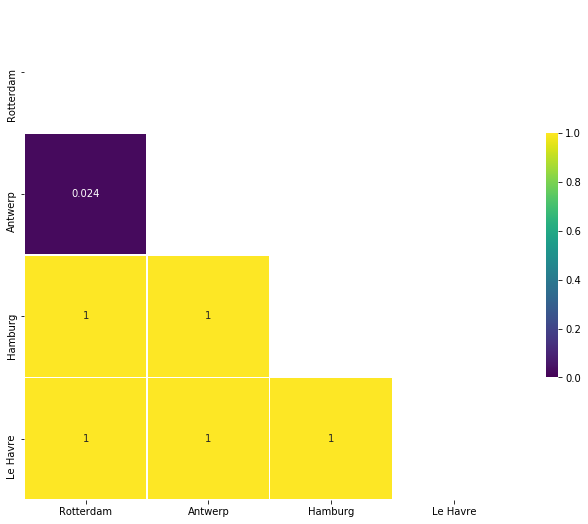

In [121]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_inland_cooperation_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_inland_cooperation_3, mask=mask, cmap='viridis', linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [122]:
# Dataframe for visualization of sea connectivity
df_visualization_inland_connectivity = pd.DataFrame(columns=inland_hubs, index=range(1))

for key,values in inland_connectivity.items():
    df_visualization_inland_connectivity.loc[0,key] = values
    
df_visualization_inland_connectivity_2 = np.float64(df_visualization_inland_connectivity)
df_visualization_inland_connectivity_3 = pd.DataFrame(data=df_visualization_inland_connectivity_2, index=range(1), columns=inland_hubs)

In [177]:
all_inland_cooperation_index = dict(df_inland_cooperation.sum(axis=1))

df_all_inland_cooperation_index= pd.DataFrame(columns=inland_hubs, index=range(1))

for key,values in all_inland_cooperation_index.items():
    df_all_inland_cooperation_index.loc[0,key] = values
    
df_all_inland_cooperation_index_2 = np.float64(df_all_inland_cooperation_index)
df_all_inland_cooperation_index_3 = pd.DataFrame(data=df_all_inland_cooperation_index_2, index=range(1), columns=inland_hubs)

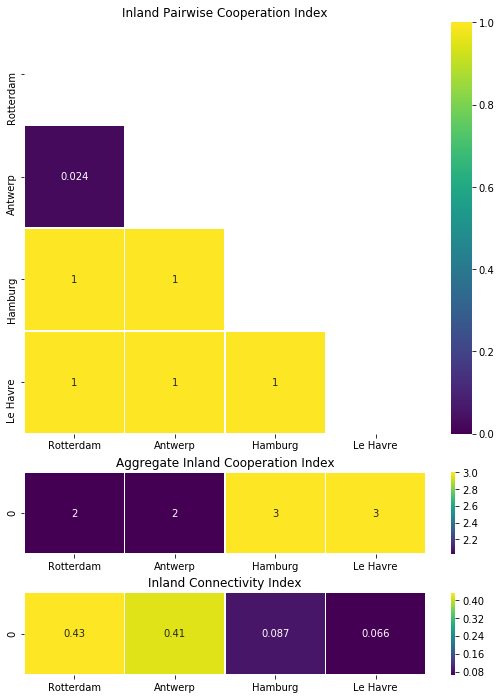

In [247]:
# Gabungan plot
#f, ax = plt.subplots(figsize=(11,9),nrows=2, ncols=1)

# plot it
fig = plt.figure(figsize=(9, 12)) 
gs = gridspec.GridSpec(3, 1, height_ratios=[5, 1, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

# Generate a mask for the upper triangle
mask = np.zeros_like(df_inland_cooperation_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_inland_cooperation_3, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax0)
ax0.set_title("Inland Pairwise Cooperation Index")

# Draw aggregate cooperation index
sns.heatmap(df_all_inland_cooperation_index_3, cmap='viridis', linewidths=.5, annot=True, ax=ax1)
ax1.set_title("Aggregate Inland Cooperation Index")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_visualization_inland_connectivity_3, cmap='viridis', linewidths=.5, annot=True, ax=ax2)
ax2.set_title("Inland Connectivity Index")

fig.savefig("Cooperation_Connectivity_inland_heatmap_2019.png")

Text(0, 0.5, 'Aggregate Inland Cooperative Index')

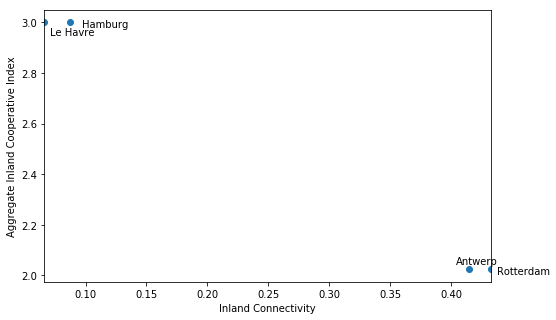

In [219]:
df_inland_scatter = pd.DataFrame(columns=['Inland Connectivity','Aggregate Inland Cooperative Index','Labels'], index=inland_hubs)

for i in inland_hubs:
    df_inland_scatter.loc[i,'Inland Connectivity'] = inland_connectivity[i]
    df_inland_scatter.loc[i,'Aggregate Inland Cooperative Index'] = all_inland_cooperation_index[i]
    df_inland_scatter.loc[i,'Labels'] = i
    
ax_scatter_inland = df_inland_scatter.set_index('Inland Connectivity')['Aggregate Inland Cooperative Index'].plot(style='o', figsize=(8,5))

def label_point_inland(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
   # for i, point in a.iterrows():
   #     ax.text(point['x']+0.01, point['y']-0.02, str(point['val']))
        
label_point_inland(df_inland_scatter["Inland Connectivity"], df_inland_scatter['Aggregate Inland Cooperative Index'], df_inland_scatter['Labels'], ax_scatter_inland)

ax_scatter_inland.text(0.432584+0.005, 2.02381-0.02, str('Rotterdam'))
ax_scatter_inland.text(0.414516-0.01, 2.02381+0.02, str('Antwerp'))
ax_scatter_inland.text(0.0868509+0.01, 3-0.02, str('Hamburg'))
ax_scatter_inland.text(0.0660492+0.005, 3-0.05, str('Le Havre'))

ax_scatter_inland.set_xlabel('Inland Connectivity')
ax_scatter_inland.set_ylabel('Aggregate Inland Cooperative Index')

In [240]:
linregress(list(df_inland_scatter["Inland Connectivity"].values), list(df_inland_scatter['Aggregate Inland Cooperative Index'].values))

LinregressResult(slope=-2.803585977228419, intercept=3.2128012562118666, rvalue=-0.9984283547934204, pvalue=0.0015716452065795978, stderr=0.11127651677541128)

## Rail

In [124]:
df_rail_cooperation_2 = np.float64(df_rail_cooperation)
df_rail_cooperation_3 = pd.DataFrame(data=df_rail_cooperation_2, index=rail_hubs, columns=rail_hubs)

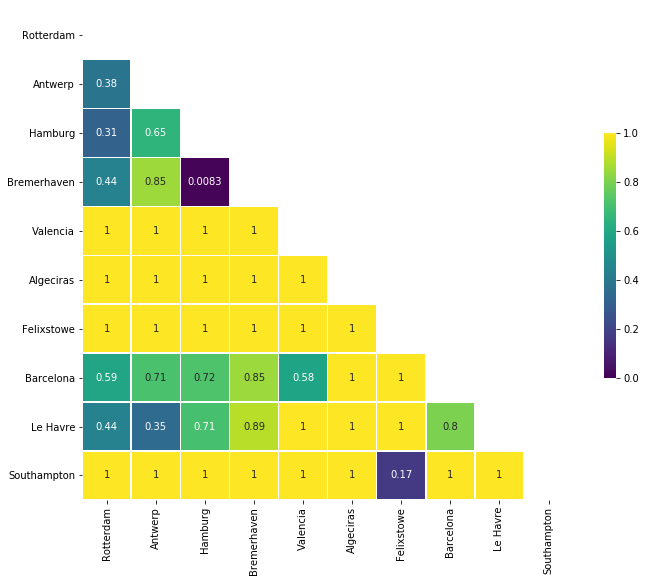

In [125]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_rail_cooperation_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_rail_cooperation_3, mask=mask, cmap='viridis', linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [126]:
# Dataframe for visualization of sea connectivity
df_visualization_rail_connectivity = pd.DataFrame(columns=rail_hubs, index=range(1))

for key,values in rail_connectivity.items():
    df_visualization_rail_connectivity.loc[0,key] = values
    
df_visualization_rail_connectivity_2 = np.float64(df_visualization_rail_connectivity)
df_visualization_rail_connectivity_3 = pd.DataFrame(data=df_visualization_rail_connectivity_2, index=range(1), columns=rail_hubs)

In [172]:
all_rail_cooperation_index = dict(df_rail_cooperation.sum(axis=1))

df_all_rail_cooperation_index= pd.DataFrame(columns=rail_hubs, index=range(1))

for key,values in all_rail_cooperation_index.items():
    df_all_rail_cooperation_index.loc[0,key] = values
    
df_all_rail_cooperation_index_2 = np.float64(df_all_rail_cooperation_index)
df_all_rail_cooperation_index_3 = pd.DataFrame(data=df_all_rail_cooperation_index_2, index=range(1), columns=rail_hubs)

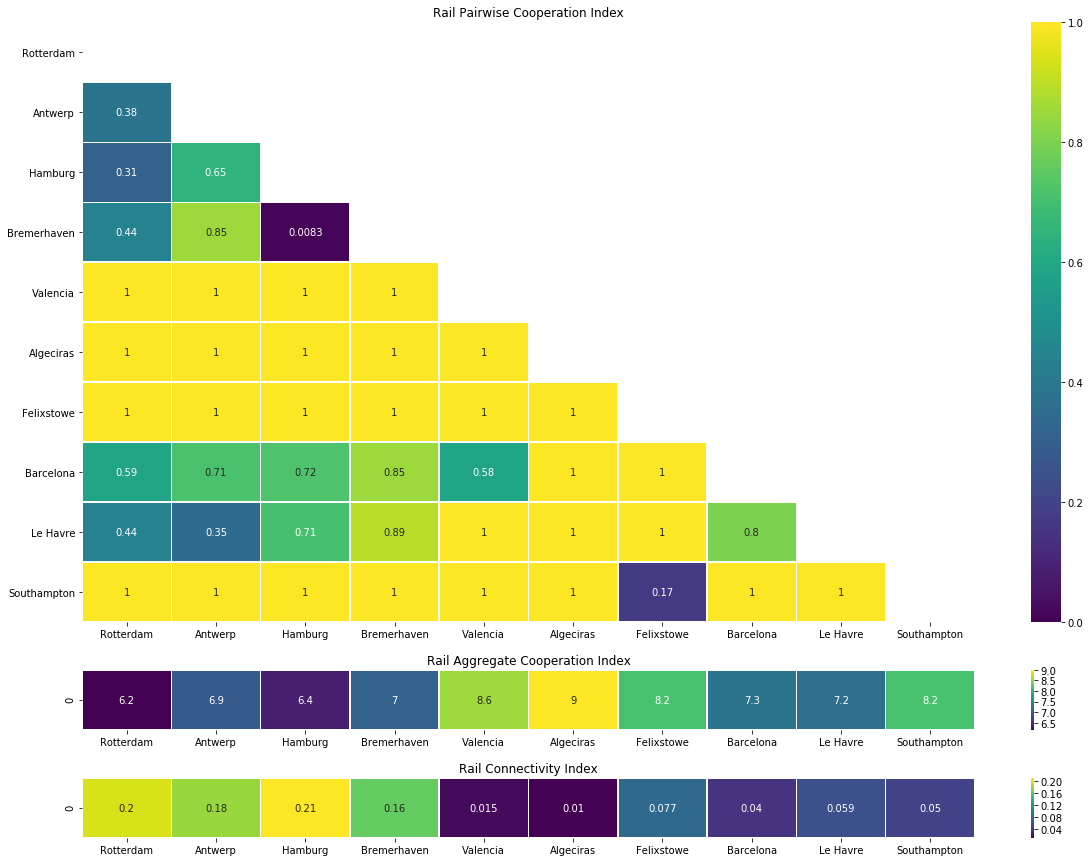

In [246]:
# Gabungan plot
#f, ax = plt.subplots(figsize=(11,9),nrows=2, ncols=1)

# plot it
fig = plt.figure(figsize=(20, 15)) 
gs = gridspec.GridSpec(3, 1, height_ratios=[10, 1, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

# Generate a mask for the upper triangle
mask = np.zeros_like(df_rail_cooperation_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_rail_cooperation_3, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax0)
ax0.set_title("Rail Pairwise Cooperation Index")

# Draw the aggregate cooperation index
sns.heatmap(df_all_rail_cooperation_index_3, cmap='viridis', linewidths=.5, annot=True, ax=ax1)
ax1.set_title("Rail Aggregate Cooperation Index")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_visualization_rail_connectivity_3, cmap='viridis', linewidths=.5, annot=True, ax=ax2)
ax2.set_title("Rail Connectivity Index")

fig.savefig("Cooperation_Connectivity_Rail_heatmap_2019.png")

Text(0, 0.5, 'Aggregate Rail Cooperative Index')

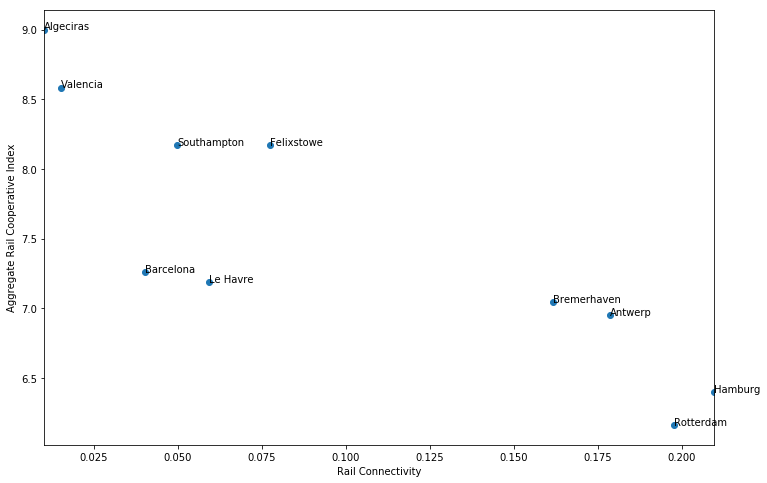

In [191]:
df_rail_scatter = pd.DataFrame(columns=['Rail Connectivity','Aggregate Rail Cooperative Index','Labels'], index=rail_hubs)

for i in rail_hubs:
    df_rail_scatter.loc[i,'Rail Connectivity'] = rail_connectivity[i]
    df_rail_scatter.loc[i,'Aggregate Rail Cooperative Index'] = all_rail_cooperation_index[i]
    df_rail_scatter.loc[i,'Labels'] = i
    
ax_scatter_rail = df_rail_scatter.set_index('Rail Connectivity')['Aggregate Rail Cooperative Index'].plot(style='o',figsize=(12,8))

def label_point_rail(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        
label_point_rail(df_rail_scatter["Rail Connectivity"], df_rail_scatter['Aggregate Rail Cooperative Index'], df_rail_scatter['Labels'], ax_scatter_rail)
ax_scatter_rail.set_xlabel('Rail Connectivity')
ax_scatter_rail.set_ylabel('Aggregate Rail Cooperative Index')

In [238]:
linregress(list(df_rail_scatter["Rail Connectivity"].values), list(df_rail_scatter['Aggregate Rail Cooperative Index'].values))

LinregressResult(slope=-10.37112156621232, intercept=8.528872759944335, rvalue=-0.8603137314963287, pvalue=0.0014024035137316377, stderr=2.17267031439782)

## Sea

In [128]:
df_sea_cooperation_2 = np.float64(df_sea_cooperation)
df_sea_cooperation_3 = pd.DataFrame(data=df_sea_cooperation_2, index=sea_hubs, columns=sea_hubs)

In [129]:
# Dataframe for visualization of sea connectivity
df_visualization_sea_connectivity = pd.DataFrame(columns=sea_hubs, index=range(1))

In [130]:
for key,values in sea_connectivity.items():
    df_visualization_sea_connectivity.loc[0,key] = values

In [131]:
df_visualization_sea_connectivity_2 = np.float64(df_visualization_sea_connectivity)
df_visualization_sea_connectivity_3 = pd.DataFrame(data=df_visualization_sea_connectivity_2, index=range(1), columns=sea_hubs)

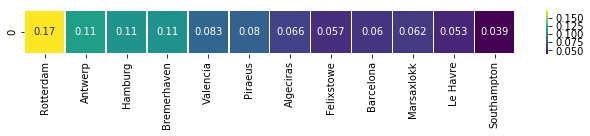

In [132]:
f, ax = plt.subplots(figsize=(11, 0.8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_visualization_sea_connectivity_3, cmap='viridis', linewidths=.5, annot=True)

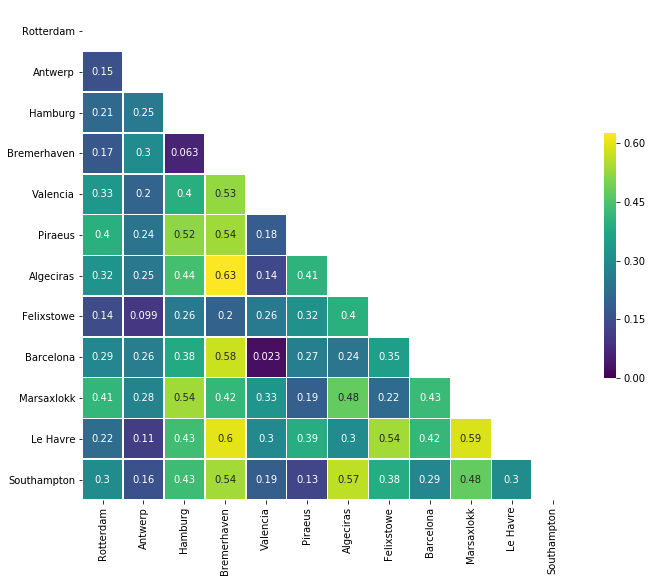

In [133]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_sea_cooperation_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_sea_cooperation_3, mask=mask, cmap='viridis', linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [163]:
all_sea_cooperation_index = dict(df_sea_cooperation.sum(axis=1))

df_all_sea_cooperation_index= pd.DataFrame(columns=all_hubs, index=range(1))

for key,values in all_sea_cooperation_index.items():
    df_all_sea_cooperation_index.loc[0,key] = values
    
df_all_sea_cooperation_index_2 = np.float64(df_all_sea_cooperation_index)
df_all_sea_cooperation_index_3 = pd.DataFrame(data=df_all_sea_cooperation_index_2, index=range(1), columns=all_hubs)

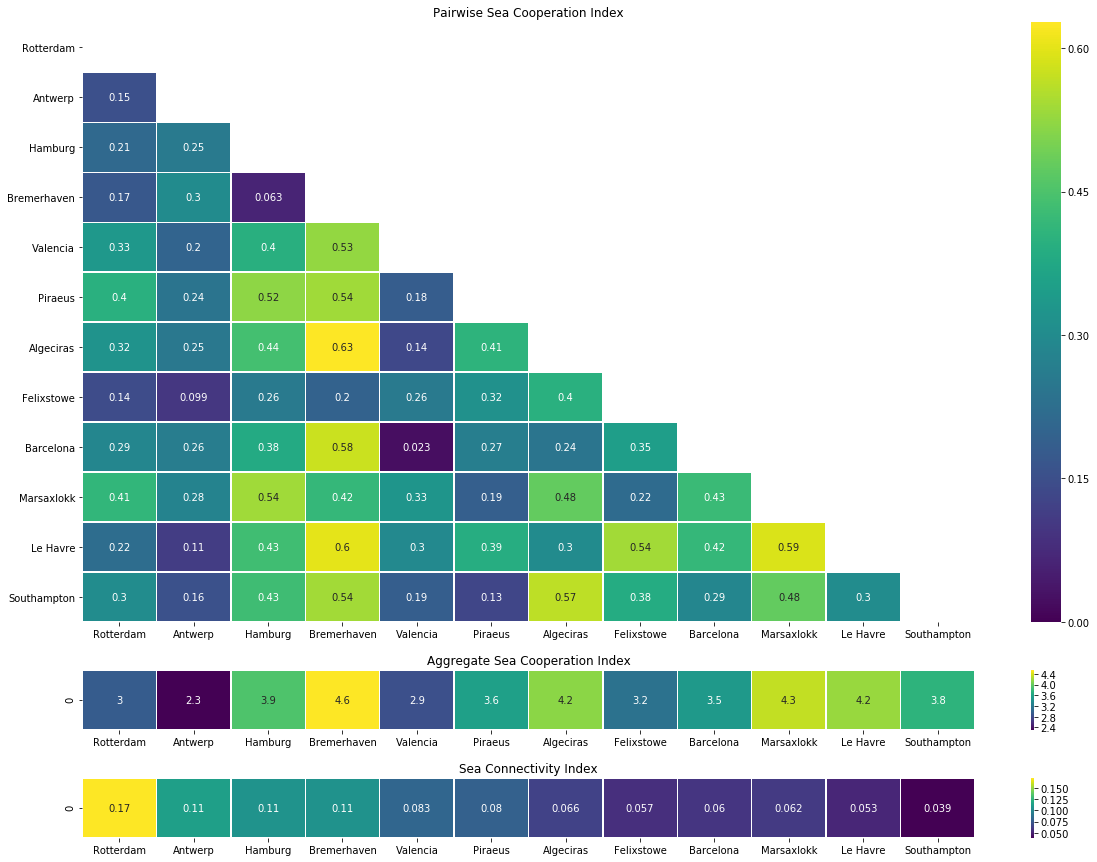

In [245]:
# Gabungan plot
#f, ax = plt.subplots(figsize=(11,9),nrows=2, ncols=1)

# plot it
fig = plt.figure(figsize=(20, 15)) 
gs = gridspec.GridSpec(3, 1, height_ratios=[10, 1, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

# Generate a mask for the upper triangle
mask = np.zeros_like(df_sea_cooperation_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_sea_cooperation_3, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax0)
ax0.set_title("Pairwise Sea Cooperation Index")

# Draw the aggregate cooperation index in sea layer
sns.heatmap(df_all_sea_cooperation_index_3, cmap='viridis', linewidths=.5, annot=True, ax=ax1)
ax1.set_title("Aggregate Sea Cooperation Index")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_visualization_sea_connectivity_3, cmap='viridis', linewidths=.5, annot=True, ax=ax2)
ax2.set_title("Sea Connectivity Index")

fig.savefig("Cooperation_Connectivity_Sea_heatmap_2019.png")

Text(0, 0.5, 'Aggregate Sea Cooperative Index')

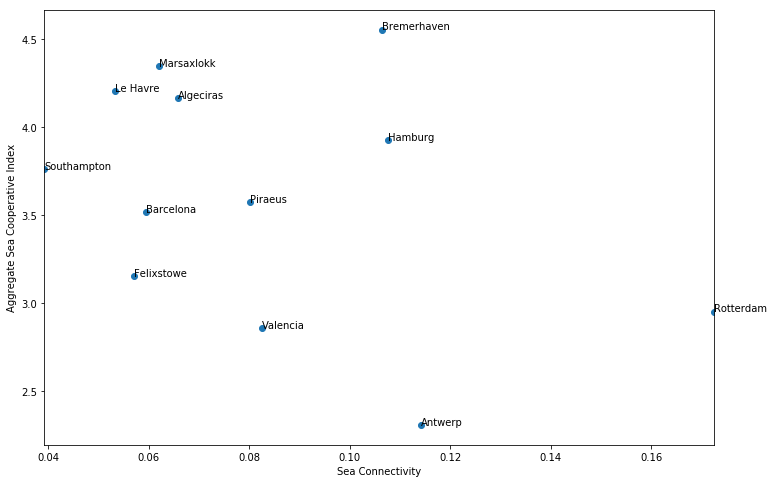

In [189]:
df_sea_scatter = pd.DataFrame(columns=['Sea Connectivity','Aggregate Sea Cooperative Index','Labels'], index=sea_hubs)

for i in all_hubs:
    df_sea_scatter.loc[i,'Sea Connectivity'] = sea_connectivity[i]
    df_sea_scatter.loc[i,'Aggregate Sea Cooperative Index'] = all_sea_cooperation_index[i]
    df_sea_scatter.loc[i,'Labels'] = i
    
ax_scatter_sea = df_sea_scatter.set_index('Sea Connectivity')['Aggregate Sea Cooperative Index'].plot(style='o',figsize=(12,8))

def label_point_sea(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        
label_point_sea(df_sea_scatter["Sea Connectivity"], df_sea_scatter['Aggregate Sea Cooperative Index'], df_sea_scatter['Labels'], ax_scatter_sea)
ax_scatter_sea.set_xlabel('Sea Connectivity')
ax_scatter_sea.set_ylabel('Aggregate Sea Cooperative Index')

In [241]:
linregress(list(df_sea_scatter["Sea Connectivity"].values), list(df_sea_scatter['Aggregate Sea Cooperative Index'].values))

LinregressResult(slope=-7.005119070200526, intercept=4.193448299723538, rvalue=-0.37788630407793544, pvalue=0.22585519761458087, stderr=5.427451393301139)

## Aggregate

In [135]:
df_all_cooperation_2 = np.float64(df_all_cooperation)
df_all_cooperation_3 = pd.DataFrame(data=df_all_cooperation_2, index=all_hubs, columns=all_hubs)

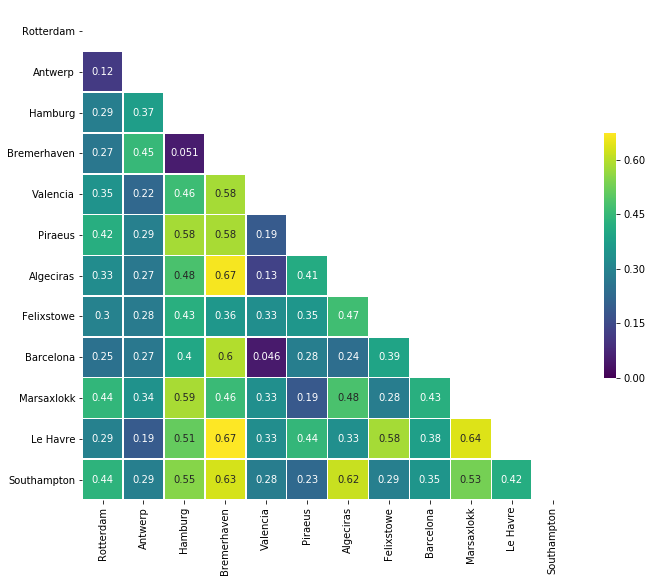

In [136]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df_all_cooperation_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_all_cooperation_3, mask=mask, cmap='viridis', linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [137]:
# Dataframe for visualization of sea connectivity
df_visualization_all_connectivity = pd.DataFrame(columns=all_hubs, index=range(1))

for key,values in all_connectivity.items():
    df_visualization_all_connectivity.loc[0,key] = values
    
df_visualization_all_connectivity_2 = np.float64(df_visualization_all_connectivity)
df_visualization_all_connectivity_3 = pd.DataFrame(data=df_visualization_all_connectivity_2, index=range(1), columns=all_hubs)

In [138]:
# Analysis - plot ke matrix sesuai paper untuk bagi sustainable hubs or not? high cooperation index vs high connectivity?

In [141]:
all_agg_cooperation_index = dict(df_all_cooperation.sum(axis=1))

df_all_agg_cooperation_index= pd.DataFrame(columns=all_hubs, index=range(1))

for key,values in all_agg_cooperation_index.items():
    df_all_agg_cooperation_index.loc[0,key] = values
    
df_all_agg_cooperation_index_2 = np.float64(df_all_agg_cooperation_index)
df_all_agg_cooperation_index_3 = pd.DataFrame(data=df_all_agg_cooperation_index_2, index=range(1), columns=all_hubs)

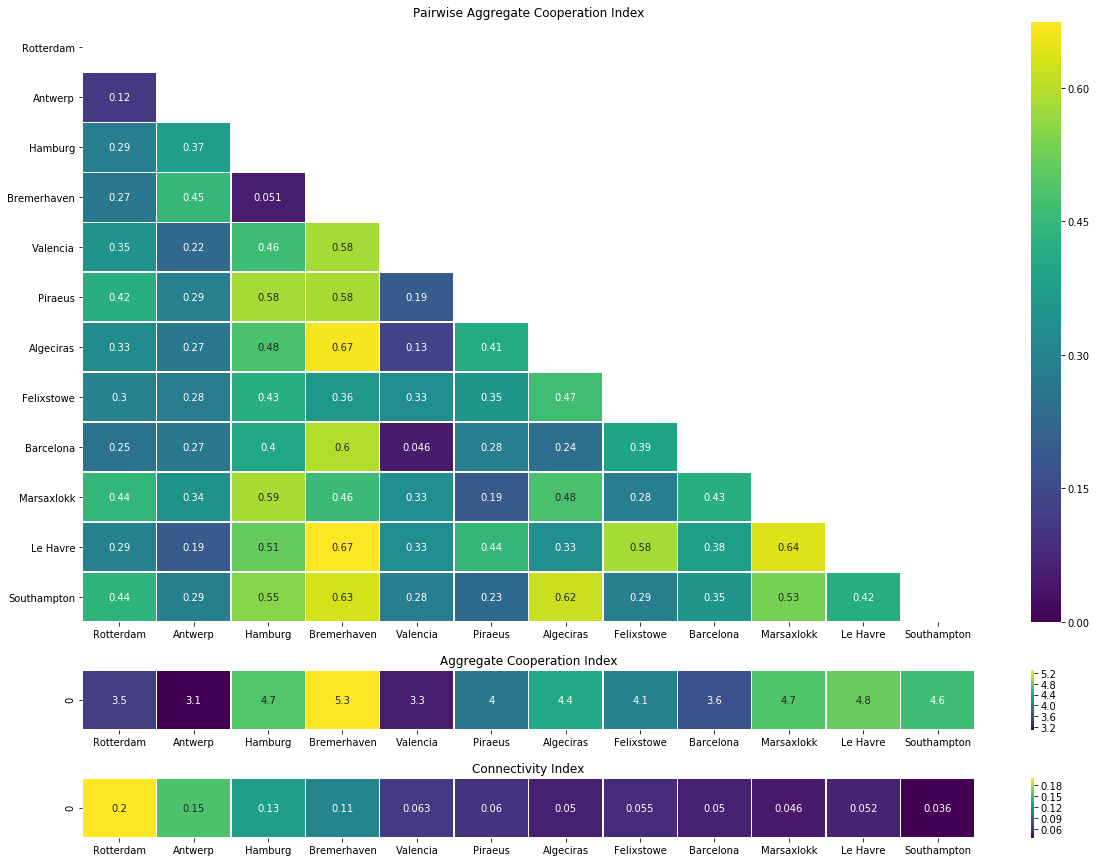

In [244]:
# Gabungan plot
#f, ax = plt.subplots(figsize=(11,9),nrows=2, ncols=1)

# plot it
fig = plt.figure(figsize=(20, 15)) 
gs = gridspec.GridSpec(3, 1, height_ratios=[10, 1, 1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

# Generate a mask for the upper triangle
mask = np.zeros_like(df_all_cooperation_3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_all_cooperation_3, mask=mask, cmap='viridis', linewidths=.5, annot=True, ax=ax0)
ax0.set_title("Pairwise Aggregate Cooperation Index")

# Average cooperation index
sns.heatmap(df_all_agg_cooperation_index_3, cmap='viridis', linewidths=.5, annot=True, ax=ax1)
ax1.set_title("Aggregate Cooperation Index")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_visualization_all_connectivity_3, cmap='viridis', linewidths=.5, annot=True, ax=ax2)
ax2.set_title("Connectivity Index")

fig.savefig("Cooperation_Connectivity_Aggregate_heatmap_2019.png")

In [144]:
df_all_scatter = pd.DataFrame(columns=['Connectivity','Aggregate Cooperative Index','Labels'], index=all_hubs)

for i in all_hubs:
    df_all_scatter.loc[i,'Connectivity'] = all_connectivity[i]
    df_all_scatter.loc[i,'Aggregate Cooperative Index'] = all_agg_cooperation_index[i]
    df_all_scatter.loc[i,'Labels'] = i
    
ax_scatter = df_all_scatter.set_index('Connectivity')['Aggregate Cooperative Index'].plot(style='o',figsize=(12,8))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        
label_point(df_all_scatter.Connectivity, df_all_scatter['Aggregate Cooperative Index'], df_all_scatter['Labels'], ax_scatter)
ax_scatter.set_xlabel('Connectivity')
ax_scatter.set_ylabel('Aggregate Cooperative Index')

Text(0, 0.5, 'Aggregate Cooperative Index')

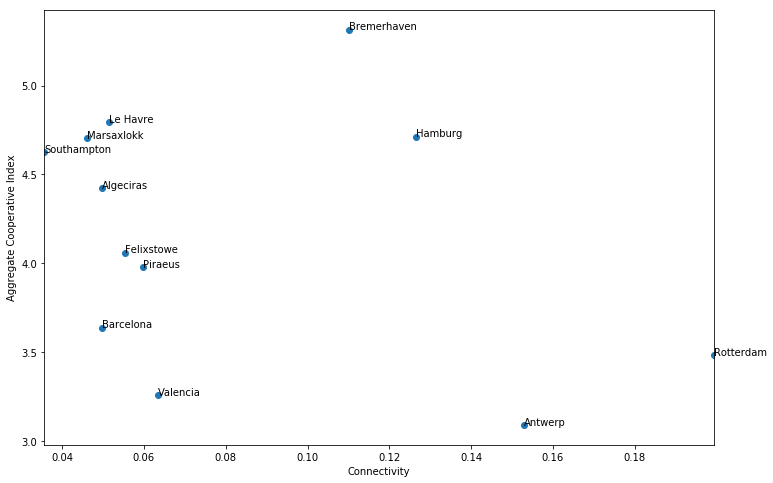

In [243]:
ax_scatter = df_all_scatter.set_index('Connectivity')['Aggregate Cooperative Index'].plot(style='o',figsize=(12,8))

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        
label_point(df_all_scatter.Connectivity, df_all_scatter['Aggregate Cooperative Index'], df_all_scatter['Labels'], ax_scatter)
ax_scatter.set_xlabel('Connectivity')
ax_scatter.set_ylabel('Aggregate Cooperative Index')


In [275]:
linregress(list(df_all_scatter["Connectivity"].values), list(df_all_scatter['Aggregate Cooperative Index'].values))

LinregressResult(slope=-4.292548496604868, intercept=4.532124393702898, rvalue=-0.3191488070760175, pvalue=0.31194592273729876, stderr=4.030834628665408)

In [148]:
# TO DO:
# Plot:
# 1. Visualization untuk semua mode transportasi: heatmap cooperation and connectivity
# 2. Scatter plot untuk connectivity vs aggregate cooperative index

In [149]:
# Kasi title untuk plot heatmap

In [150]:
# Integrate information mean untuk cooperation - done for all part, not done for sea, rail, inland

In [151]:
# Plot cooperation vs connectivity di scatter plot - pake Plotly dan kasi text buat node information

In [152]:
# Selesain untuk centrality analysis untuk top 12 ports weighted links

In [153]:
# Community structure

In [154]:
# Targeted analysis